In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from fpp import *
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import time

In [3]:
def convertClassToOneHot(label):
    # pass
    labelSize = len(np.unique(label))
    f = np.zeros((len(label), labelSize))
    for index, l in enumerate(label):
        f[index, l] = 1.0
    return f

def convertOneHotToLabel(f):
    return np.array([np.where(r==1)[0][0] for r in f])

In [4]:
########## circle synthetic data #########

xsample = np.load('data/circle_in_5D_cube.npy')
sample = xsample[:,:-1]
f = xsample[:,-1]

### setup fpp input ####
model = fpp()
model.setup(sample, f, degree=3)

### training ####
start = time.time()
model.train(30, 50) ### circle
end = time.time()
print("timing:", end-start)

total step size: 1800
timing: 1.904763937


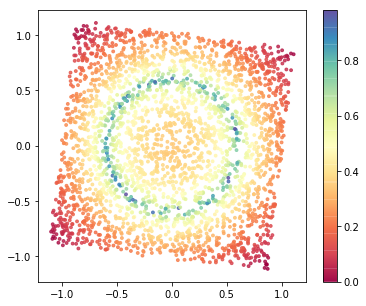

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 5
proj_mat, embedding, loss, R2 = model.eval()
plt.scatter(embedding[:,0], embedding[:,1], c=f, cmap="Spectral", alpha=0.8, s=8)
plt.colorbar()
# plt.scatter(embedding_test[:,0], embedding_test[:,1], c=y_test, cmap='Spectral', alpha=0.4, s=5)

In [6]:
#model.p_value(300)

total step size: 6000
timing: 6.69633698463


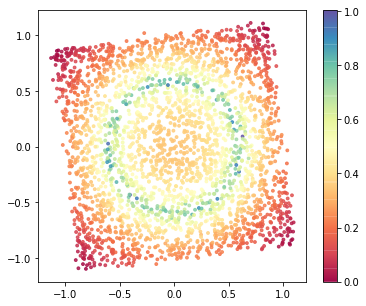

In [7]:
xsample = np.load('data/circle_in_30D.npy')
sample = xsample[:,:-1]
f = xsample[:,-1]

sample.shape, f.shape

model = fpp()
model.setup(sample, f, degree=4)

start = time.time()
model.train(100, 50) ### circle
end = time.time()
print("timing:", end-start)

from pylab import rcParams
rcParams['figure.figsize'] = 6, 5
proj_mat, embedding, loss, R2 = model.eval()
plt.scatter(embedding[:,0], embedding[:,1], c=f, cmap="Spectral", alpha=0.8, s=8)
plt.colorbar()
# plt.scatter(embedding_test[:,0], embedding_test[:,1], c=y_test, cmap='Spectral', alpha=0.4, s=5)

In [8]:
# model.p_value(300)

0 9 (60000,) (60000, 784)
total step size: 12000
Global loss: 0.91337377
computation time:  20.2757909298 (s)


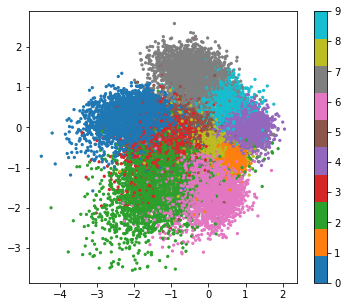

In [9]:
######### MNIST dataset ###########

mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape( (X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape( (X_test.shape[0], X_test.shape[1]*X_test.shape[2]))
sample = X_train
f = (y_train)
print (np.min(f), np.max(f), f.shape, sample.shape)

model = fpp()
model.setupMultiClass(sample, convertClassToOneHot(f), nonlinear=True)

model.reset()
start = time.time()
model.train(20, 100) ### MNIST

proj_mat, embedding, loss, R2 = model.eval()
print("Global loss:", loss)
end = time.time()
print("computation time: ", end - start, "(s)")

plt.scatter(embedding[:,0], embedding[:,1], c=y_train, cmap="tab10", alpha=1.0, s=5)
plt.colorbar(ticks=range(len(set(y_train))))

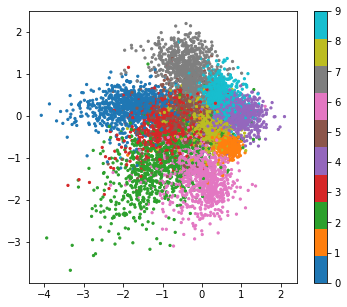

In [12]:
embedding_test = np.matmul(X_test, proj_mat)
plt.scatter(embedding_test[:,0], embedding_test[:,1], c=y_test, cmap="tab10", alpha=1.0, s=5)
plt.colorbar(ticks=range(len(set(y_test))))

/Users/liu42/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


computation time:  12.4145648479 (s)


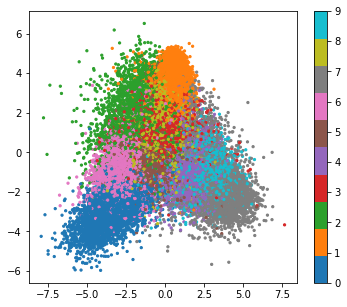

In [14]:
##### classification evaluation #######
## LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(n_components=2, solver='svd')
# clf = LinearDiscriminantAnalysis(n_components=2, solver='eigen', shrinkage='auto')

start = time.time()
clf.fit(sample, f)
LDAembedding = clf.transform(sample)
end = time.time()
print("computation time: ", end - start, "(s)")

# print (sample.shape, LDAembedding.shape, y_train.shape)
# plt.scatter(LDAembedding[:,0], LDAembedding[:,1], c=y_train, cmap=discrete_cmap(5,"jet"), alpha=0.8, s=8)
plt.scatter(LDAembedding[:,0], LDAembedding[:,1], c=y_train, cmap="tab10", alpha=1.0, s=5)
plt.colorbar(ticks=range(len(set(y_train))))
plt.show()


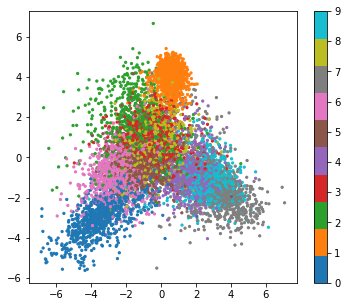

In [15]:
LDAembedding_test = clf.transform(X_test)
plt.scatter(LDAembedding_test[:,0], LDAembedding_test[:,1], c=y_test, cmap="tab10", alpha=1.0, s=5)
plt.colorbar(ticks=range(len(set(y_test))))
plt.show()

(801, 20531) 4 0
(640, 20531) (161, 20531)
total step size: 640


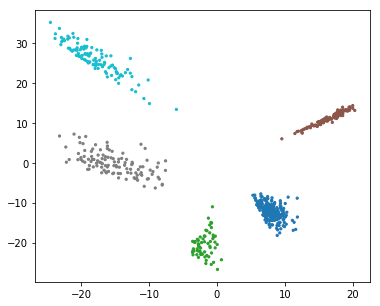

In [16]:
########## RNA-Seq dataset ############

X = np.load('data/RNA-seq-data.npy')
y = np.load('data/RNA-seq-labels.npy')
label = [np.argmax(x) for x in y]
print (X.shape, np.max(label), np.min(label))

##### apply train test split #####
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape, X_test.shape)

sample = X_train
f = convertClassToOneHot(y_train)

sample.shape, f.shape

model = fpp()
# model.setup(sample, f)
model.setupMultiClass(sample, f, nonlinear=False)

start = time.time()
model.train(50, 50, minimalStep = 10)

proj_mat, embedding, loss, R2 = model.eval()
plt.scatter(embedding[:,0], embedding[:,1], c=y_train, cmap="tab10", alpha=1.0, s=5)

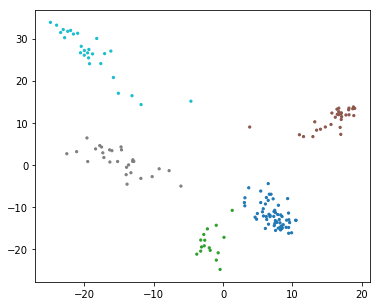

In [17]:
embedding_test = np.matmul(X_test, proj_mat)
plt.scatter(embedding_test[:,0], embedding_test[:,1], c=y_test, cmap="tab10", alpha=1.0, s=5)